# STEP 1 : Data acquisition and curation

In [1]:
# install statements
# !pip install PyPDF2


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import os
import PyPDF2
import csv
import platform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bobch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bobch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bobch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bobch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Clean text and normalize whitespaces
def read_pdf(file_path):
    reader = PyPDF2.PdfReader(file_path)
    texts = []
    for page in reader.pages:
      text = page.extract_text()
      text = text.strip('')
      text = text.replace('\n', ' ')
      text = re.sub(r'\s+', ' ', text)
      texts.append(text)
    texts = ''.join(texts)
    return texts

In [5]:
# Get current directory path
upper_dir = os.getcwd()
current_dir = upper_dir + '/src/'

# import all pdfs in folder
data = pd.DataFrame()
for file in os.listdir(current_dir):
    if file.endswith('.pdf'):
        company = (file.split('_')[0])
        year = (file.split('_')[1].split('.')[0])
        pdf = os.path.join(current_dir, file)
        print('reading', company, year)
        data.loc[company,year] = read_pdf(pdf)

C:\Users\bobch\AppData\Local\Temp\ipykernel_2932\2840472638.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'DEAR FELLOW SHAREHOLDER: MILES D. WHITE CHAIRMAN OF THE BOARD AND CHIEF EXECUTIVE OFFICER 2015 demonstrated our company’s fundamental ability to execute. In a year characterized by heavy macroeconomic headwinds, we delivered strong underlying growth in the top tier of our peer group. O U R O P E R A T I N G ENVIRONMENT Abbott’s response to those economic forces underscores the strength of our business, the unusual ﬂexibility provided by our broad and wellbalanced business diversity, and our proven ability to navigate challenging waters. The primary factor in our business environment in 2015 was the strong U.S. dollar. This is, of course, not a new phenomenon and is one that will continue to be felt in 2016. While we’ve grown accustomed to this and know well how to manage for it, this e Ưect was greater i

reading ABT 2015
reading ABT 2016
reading ABT 2017


C:\Users\bobch\AppData\Local\Temp\ipykernel_2932\2840472638.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'DEAR FELLOW SHAREHOLDER: Abbott is here to create value. We do so by helping the people who use our products achieve better health. And we do so by helping our shareholders achieve ﬁnancial growth. 2017 was an outstanding year for our company in both respects. FOCUS ON THE FUTURE The way we consistently create and deliver that value is by keeping our focus squarely on the future. This year marks our company’s 130th anniversary. But our view is that we’re only as old as our last year – that Abbott is a perpetually new company with a long legacy of success that informs where we go next and how we get there. That’s a powerful combination: the experience of a company that’s succeeded for generations, and the ambition and energy of a new company with fresh opportunities. We work very deliberately to ensure th

reading AMZN 2015
reading AMZN 2016
reading AMZN 2017
reading CVBF 2015
reading CVBF 2016
reading CVBF 2017
reading HIBB 2015
reading HIBB 2016
reading HIBB 2017
reading HMSY 2015
reading HMSY 2016
reading HMSY 2017
reading JPM 2015
reading JPM 2016
reading JPM 2017
reading KELYA 2015
reading KELYA 2016
reading KELYA 2017
reading WMT 2015
reading WMT 2016
reading WMT 2017


In [6]:
# wrtie the extracted letters to a csv file
filename = current_dir + '//' + 'output.csv'
data.to_csv(filename, index=True, header=True)


In [7]:
# read the csv file into a dataframe
data = pd.read_csv(current_dir + '//' + 'output.csv')
data.rename(columns={'Unnamed: 0': 'Company'}, inplace=True)
data.set_index('Company', inplace=True)
data

,2015,2016,2017
Company,,,
ABT,DEAR FELLOW SHAREHOLDER: MILES D. WHITE CHAIRM...,DEAR FELLOW SHAREHOLDER: ABBOTT REMAINS ONE OF...,DEAR FELLOW SHAREHOLDER: Abbott is here to cre...
AMZN,"“JeƯ, what does Day 2 look like?” That’s a que...","Dd “JeƯ, what does Day 2 look like?” That’s a ...",To our shareowners: The American Customer Sati...
CVBF,"TO OUR SHAREHOLDERS, CUSTOMERS, AND ASSOCIATES...","TO OUR SHAREHOLDERS, CUSTOMERS, AND ASSOCIATES...","TO OUR SHAREHOLDERS, CUSTOMERS, AND ASSOCIATES..."
HIBB,I am pleased to write you about another succes...,"During Fiscal 2016, Hibbett Sports continued t...","During the past year, the retail industry cont..."
HMSY,"Dear Shareholder, Expenditures in the U.S. hea...","Dear Shareholder, 2016 was a year of solid gro...","Dear Shareholder, The healthcare industry is i..."
JPM,"FICO 2 Dear Fellow Shareholders, Last year — i...","2 Dear Fellow Shareholders, I begin this lette...","2 Jamie Dimon, Chairman and Chief Executive O ..."
KELYA,TO OUR SHAREHOLDERS Kelly entered 2015 with a ...,Kelly entered 2016 with a ﬁrm commitment to in...,To Our Shareholders 2017was a year of change a...
WMT,erchant-minded that we’ll continue to connect ...,"Dear shareholders, associates and customers: T...","Dear shareholders, associates and customers: A..."


#STEP 2 : Preprocessing and baseline analysis

## Refined Data Extraction and Restructuring


In [8]:
# get word count and sentence count
def get_unique_words_ratio(text):
    words = word_tokenize(text)
    unique_words = set(words)
    if len(words) == 0:
        return 0
    return len(unique_words) / len(words)

word_count = data.applymap(lambda x:len(nltk.word_tokenize(x)))
sentence_count = data.applymap(lambda x:len(nltk.sent_tokenize(x)))
avg_sentence_length = word_count / sentence_count
unique_word_ratio = data.applymap(lambda x:get_unique_words_ratio(x))*100

simple_stats = pd.DataFrame(index=data.index)
simple_stats['word_count'] = word_count.sum(axis=1)
simple_stats['sentence_count'] = sentence_count.sum(axis=1)
simple_stats['avg_sentence_length'] = avg_sentence_length.mean(axis=1)
simple_stats['unique_word_ratio'] = unique_word_ratio.mean(axis=1)
simple_stats


C:\Users\bobch\AppData\Local\Temp\ipykernel_2932\4064077710.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_count = data.applymap(lambda x:len(nltk.word_tokenize(x)))
C:\Users\bobch\AppData\Local\Temp\ipykernel_2932\4064077710.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentence_count = data.applymap(lambda x:len(nltk.sent_tokenize(x)))
C:\Users\bobch\AppData\Local\Temp\ipykernel_2932\4064077710.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unique_word_ratio = data.applymap(lambda x:get_unique_words_ratio(x))*100


,word_count,sentence_count,avg_sentence_length,unique_word_ratio
Company,,,,
ABT,4312,175,24.619080,40.162977
AMZN,15166,667,22.403029,29.709131
CVBF,1471,69,21.373682,53.778890
HIBB,3458,123,28.119485,40.693526
HMSY,3187,101,32.305101,47.732185
JPM,45252,1690,29.082263,23.339491
KELYA,3870,141,27.615222,39.124779
WMT,3548,159,22.303363,38.934742


In [9]:
def get_top_bigrams(text, n=10):
    filter_words = ['company', 'year', 'dear', 'shareholder', 'letter', 'business', 'management',
                    'financial', 'performance', 'report', 'include', 'also', 'may', 'one', 'two', 'new', 'use', 'used',
                    'using', 'we', 'us', 'our', 'will', 'would', 'could', 'should', 'can', 'may', 'might', 'must',
                    'the', 'and', 'is', 'in', 'to', 'of', 'a', 'for', 'on', 'that', 'with', 'as', 'by', 'at']
    company_name = ['abbott', 'amazon', 'cvbf', 'hibb', 'jpmorgan', 'hmsys', 'kelya', 'walmart']
    words = word_tokenize(text)
    cleaned_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words]
    cleaned_words = [word for word in cleaned_words if word]
    cleaned_words = [word for word in cleaned_words if word not in english_stopwords]
    cleaned_words = [word.lower() for word in cleaned_words]
    cleaned_words = [WordNetLemmatizer().lemmatize(word) for word in cleaned_words]
    cleaned_words = [PorterStemmer().stem(word) for word in cleaned_words]
    cleaned_words = [word for word in cleaned_words if word not in filter_words]
    cleaned_words = [word for word in cleaned_words if word not in company_name]
    cleaned_words = [word for word in cleaned_words if len(word) > 1]
    bigrams = ngrams(cleaned_words, 2)
    bigram_freq = Counter(bigrams)
    return bigram_freq.most_common(n)

english_stopwords = set(stopwords.words('english'))


top_bigrams = data.applymap(lambda x:get_top_bigrams(x, n=5))
top_bigrams

C:\Users\bobch\AppData\Local\Temp\ipykernel_2932\2625042831.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_bigrams = data.applymap(lambda x:get_top_bigrams(x, n=5))


,2015,2016,2017
Company,,,
ABT,"[((abil, execut), 2), ((deliv, strong), 2), ((...","[((lead, healthcar), 4), ((shape, compani), 3)...","[((st, jude), 3), ((creat, valu), 2), ((peopl,..."
AMZN,"[((machin, learn), 8), ((market, leadership), ...","[((machin, learn), 8), ((market, leadership), ...","[((high, standard), 36), ((prime, member), 8),..."
CVBF,"[((cvb, financi), 5), ((financi, corp), 5), ((...","[((busi, bank), 4), ((citizen, busi), 3), ((cv...","[((busi, bank), 5), ((commun, bank), 4), ((tot..."
HIBB,"[((scal, 2015), 6), ((major, initi), 4), ((hib...","[((fiscal, 2016), 6), ((hibbett, sport), 5), (...","[((fiscal, 2017), 5), ((fiscal, 2018), 4), ((o..."
HMSY,"[((health, plan), 9), ((revenu, growth), 3), (...","[((health, plan), 4), ((per, share), 3), ((car...","[((care, manag), 3), ((revenu, growth), 3), ((..."
JPM,"[((unit, state), 23), ((around, world), 18), (...","[((oper, risk), 16), ((tangibl, book), 14), ((...","[((per, share), 13), ((tangibl, book), 13), ((..."
KELYA,"[((sta, ing), 5), ((talent, suppli), 4), ((sup...","[((sta, ing), 10), ((joint, ventur), 6), ((sha...","[((sta, ing), 7), ((gross, prot), 3), ((talent..."
WMT,"[((world, better), 2), ((think, di), 2), ((di,...","[((suppli, chain), 4), ((win, custom), 3), ((s...","[((serv, custom), 4), ((comp, sale), 3), ((inv..."


##Text Cleaning and Preprocessing to Yearly Segments

## Visualization


c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ABT'),
  Text(1, 0, 'AMZN'),
  Text(2, 0, 'CVBF'),
  Text(3, 0, 'HIBB'),
  Text(4, 0, 'HMSY'),
  Text(5, 0, 'JPM'),
  Text(6, 0, 'KELYA'),
  Text(7, 0, 'WMT')])

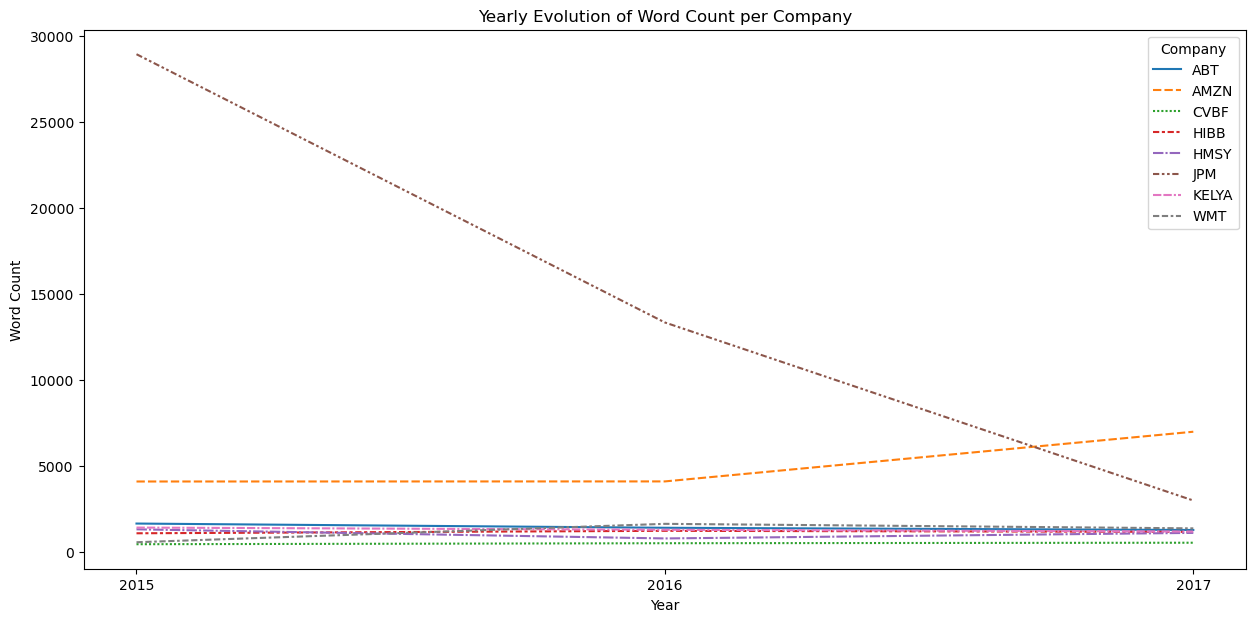

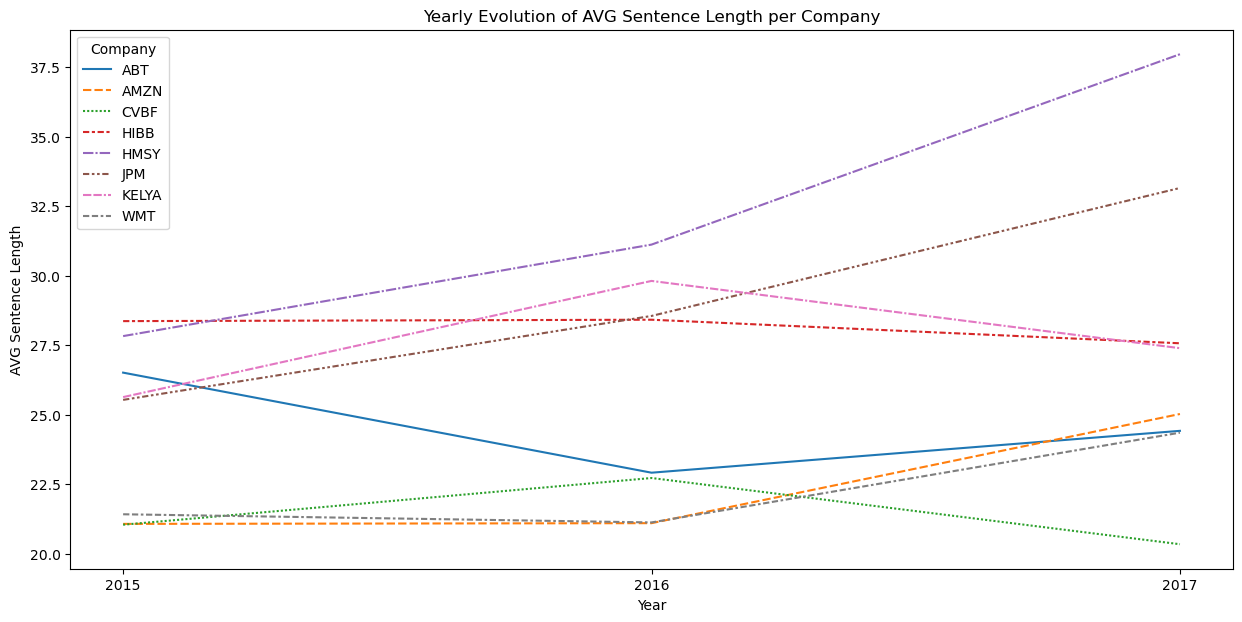

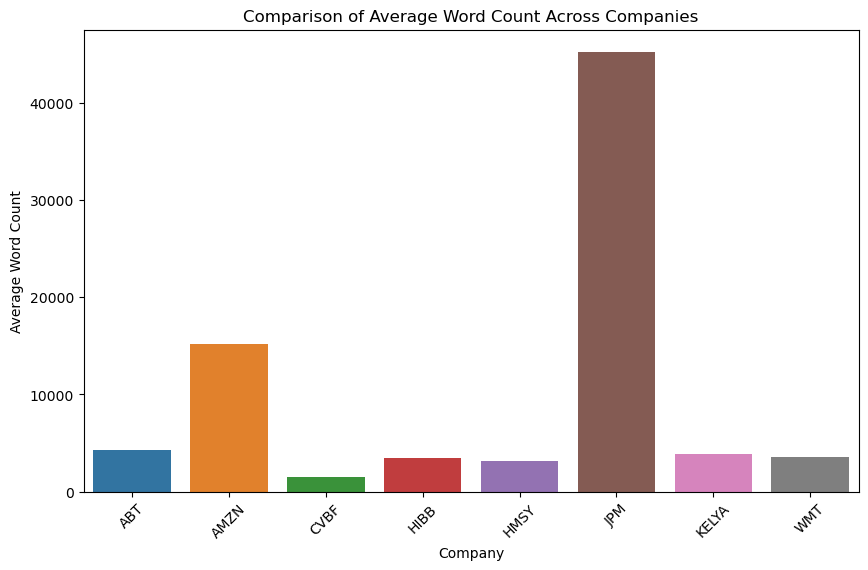

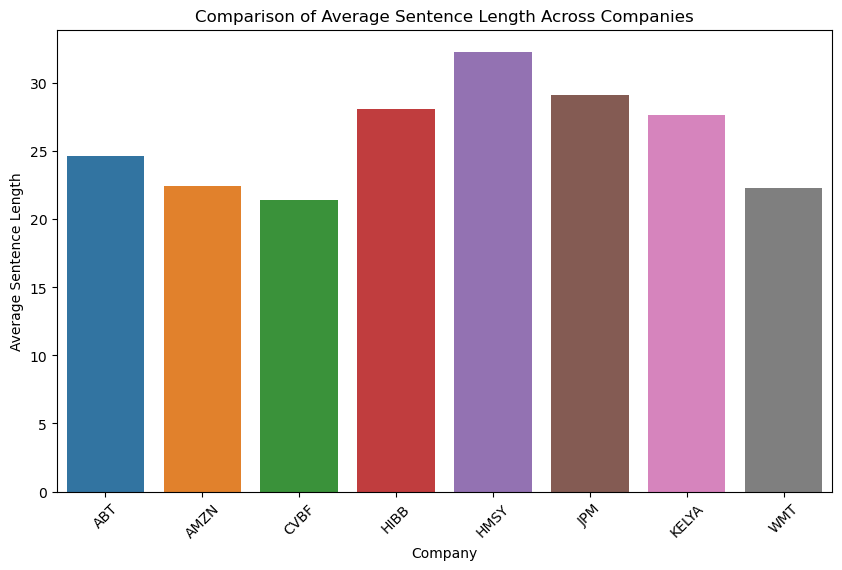

In [10]:
# 1. Yearly Evolution of Word Count per Company
plt.figure(figsize=(15, 7))
sns.lineplot(data=word_count.T)
plt.title('Yearly Evolution of Word Count per Company')
plt.xlabel('Year')
plt.ylabel('Word Count')
# 2. Yearly Evolution of AVG Sentence Length per Company
plt.figure(figsize=(15, 7))
sns.lineplot(data=avg_sentence_length.T)
plt.title('Yearly Evolution of AVG Sentence Length per Company')
plt.xlabel('Year')
plt.ylabel('AVG Sentence Length')
# 3. Comparison of average word count across companies
plt.figure(figsize=(10, 6))
sns.barplot(x=simple_stats.index, y=simple_stats['word_count'])
plt.title('Comparison of Average Word Count Across Companies')
plt.xlabel('Company')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
# 4. Comparison of average sentence length across companies
plt.figure(figsize=(10, 6))
sns.barplot(x=simple_stats.index, y=simple_stats['avg_sentence_length'])
plt.title('Comparison of Average Sentence Length Across Companies')
plt.xlabel('Company')
plt.ylabel('Average Sentence Length')
plt.xticks(rotation=45)

#STEP 3 : Tone and emotion analysis (core tasks)

### Finance-specific Tone - Loughran-McDonald Dictionary

In [11]:
df_yearly_letters = data.reset_index().melt(id_vars=['Company'], var_name='Year', value_name='Letter_Text')
df_yearly_letters.rename(columns={'Company':'company_name','Year':'year_of_report','Letter_Text':'full_letter_content'}, inplace=True)
df_yearly_letters['yearly_content'] = df_yearly_letters['full_letter_content']
df_yearly_letters['cleaned_yearly_content'] = df_yearly_letters['yearly_content']

In [12]:
print("Loading Loughran-McDonald Master Dictionary...")

lm_path = "src/Loughran-McDonald_MasterDictionary_1993-2024.csv"
if not os.path.exists(lm_path):
    raise FileNotFoundError(f"LM dictionary not found at {lm_path}")

lm = pd.read_csv(lm_path)
lm_positive = set(lm[lm['Positive'] > 0]['Word'].str.lower())
lm_negative = set(lm[lm['Negative'] > 0]['Word'].str.lower())
lm_uncertainty = set(lm[lm['Uncertainty'] > 0]['Word'].str.lower())
lm_litigious = set(lm[lm['Litigious'] > 0]['Word'].str.lower())
lm_strong_modal = set(lm[lm['Strong_Modal'] > 0]['Word'].str.lower())
lm_weak_modal = set(lm[lm['Weak_Modal'] > 0]['Word'].str.lower())

def lm_scores(tokens):
    if not tokens:
        return {k:0.0 for k in ['pos','neg','unc','lit','smod','wmod']}
    n = len(tokens)
    return {
        'pos': sum(w in lm_positive for w in tokens)/n,
        'neg': sum(w in lm_negative for w in tokens)/n,
        'unc': sum(w in lm_uncertainty for w in tokens)/n,
        'lit': sum(w in lm_litigious for w in tokens)/n,
        'smod': sum(w in lm_strong_modal for w in tokens)/n,
        'wmod': sum(w in lm_weak_modal for w in tokens)/n,
    }

df_yearly_letters['tokens'] = df_yearly_letters['cleaned_yearly_content'].str.lower().apply(
    lambda x: [w for w in word_tokenize(x) if w.isalpha()]
)
lm_res = df_yearly_letters['tokens'].apply(lm_scores).apply(pd.Series)
df_yearly_letters = pd.concat([df_yearly_letters, lm_res], axis=1)

Loading Loughran-McDonald Master Dictionary...


In [13]:
sia = SentimentIntensityAnalyzer()

def vader_stats(text):
    sents = sent_tokenize(text)
    if not sents:
        return {'vader_comp':0, 'pos_prop':0, 'neg_prop':0}
    compounds = [sia.polarity_scores(s)['compound'] for s in sents]
    pos = sum(c > 0.05 for c in compounds) / len(compounds)
    neg = sum(c < -0.05 for c in compounds) / len(compounds)
    return {'vader_comp': np.mean(compounds), 'pos_prop': pos, 'neg_prop': neg}

vader_res = df_yearly_letters['cleaned_yearly_content'].apply(vader_stats).apply(pd.Series)
df_yearly_letters = pd.concat([df_yearly_letters, vader_res], axis=1)

In [14]:
nrc_path = "src/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"

if not os.path.exists(nrc_path):
    raise FileNotFoundError("Download NRC lexicon to src/")

emotions = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
nrc = {e:set() for e in emotions}
with open(nrc_path, encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 3:
            word, emo, val = parts
            if val == '1' and emo in emotions: 
                nrc[emo].add(word.lower())

def nrc_scores(tokens):
    if not tokens:
        return {f'nrc_{e}':0.0 for e in emotions}
    n = len(tokens)
    return {f'nrc_{e}': sum(w in nrc[e] for w in tokens)/n for e in emotions}

nrc_res = df_yearly_letters['tokens'].apply(nrc_scores).apply(pd.Series)
df_yearly_letters = pd.concat([df_yearly_letters, nrc_res], axis=1)
print("NRC emotion scores added")

NRC emotion scores added


In [15]:
cols = ['year_of_report','company_name','pos','neg','unc','lit','smod','wmod',
        'vader_comp','pos_prop','neg_prop'] + [f'nrc_{e}' for e in emotions]

df_results = df_yearly_letters[cols].copy()
df_results.to_csv("tone_emotion_results.csv", index=False)
print("Saved tone_emotion_results.csv")
df_results.head()

Saved tone_emotion_results.csv


,year_of_report,company_name,pos,neg,unc,lit,smod,wmod,vader_comp,pos_prop,neg_prop,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_sadness,nrc_surprise,nrc_trust
0,2015,ABT,0.027292,0.005598,0.006298,0.000000,0.005598,0.002099,0.367387,0.645161,0.032258,0.000700,0.028691,0.000700,0.004199,0.014696,0.001400,0.003499,0.044087
1,2015,AMZN,0.023166,0.016335,0.008316,0.000891,0.012177,0.004455,0.255586,0.577320,0.103093,0.010989,0.039204,0.005940,0.014553,0.024057,0.007722,0.011286,0.048708
2,2015,CVBF,0.027548,0.000000,0.002755,0.002755,0.008264,0.002755,0.304924,0.619048,0.000000,0.005510,0.033058,0.000000,0.013774,0.013774,0.005510,0.002755,0.060606
3,2015,HIBB,0.034670,0.005417,0.005417,0.000000,0.010834,0.002167,0.490529,0.868421,0.052632,0.005417,0.034670,0.005417,0.006501,0.024919,0.003250,0.009751,0.055255
4,2015,HMSY,0.022948,0.015887,0.016770,0.006178,0.002648,0.003530,0.328040,0.723404,0.148936,0.009709,0.030891,0.005296,0.013239,0.011474,0.000883,0.005296,0.042365


c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bobch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

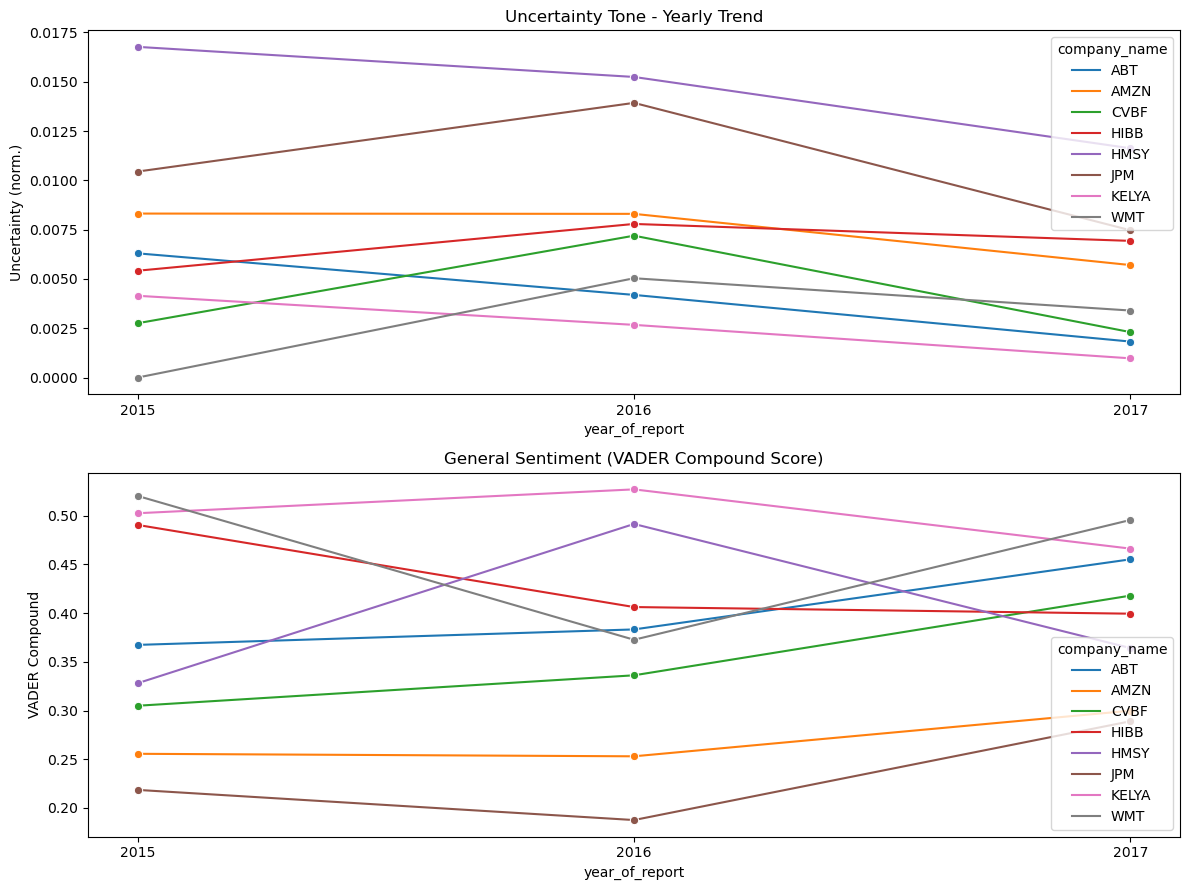

NameError: name 'emo_cols' is not defined

In [16]:
fig, ax = plt.subplots(2,1, figsize=(12,9))
sns.lineplot(data=df_results, x='year_of_report', y='unc', hue='company_name', marker='o', ax=ax[0])
ax[0].set_title('Uncertainty Tone - Yearly Trend')
ax[0].set_ylabel('Uncertainty (norm.)')

sns.lineplot(data=df_results, x='year_of_report', y='vader_comp', hue='company_name', marker='o', ax=ax[1])
ax[1].set_title('General Sentiment (VADER Compound Score)')
ax[1].set_ylabel('VADER Compound')
plt.tight_layout()
plt.savefig('tone_time_series.png', dpi=300, bbox_inches='tight')
plt.show()


df_emo_avg = df_results.groupby('company_name')[emo_cols].mean()

df_emo_avg.columns = [col.replace('nrc_', '') for col in df_emo_avg.columns]

plt.figure(figsize=(10,6))
sns.heatmap(df_emo_avg.T, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Average NRC Emotion Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Emotion')
plt.savefig('emotion_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(9,6))
sns.scatterplot(data=df_results, x='pos', y='neg',
                hue='company_name', size='year_of_report', sizes=(60,200), alpha=0.8)
plt.title('Positive vs Negative Tone (Loughran-McDonald)')
plt.xlabel('Positive Tone')
plt.ylabel('Negative Tone')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.savefig('pos_vs_neg_scatter.png', dpi=300, bbox_inches='tight')
plt.show()